# Simple Optimization Examples

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### Simple unconstrained optimization example

Success? True
Solution: 1
Number of function evaluations: 9
Number of iterations: 2


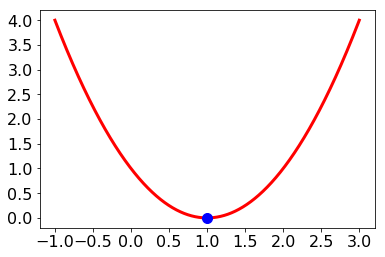

In [2]:
def myfun(x):
    return (x-1)**2

sol = minimize(myfun,0)

print("Success? %r" % sol.success)
print("Solution: %g" % sol.x[0])
print("Number of function evaluations: %d" % sol.nfev)
print("Number of iterations: %d" % sol.nit)

x = np.linspace(-1,3,1000)



plt.plot(x,myfun(x),lw=3,color='r')
plt.plot(sol.x,myfun(sol.x),'o',lw=3,color ='b',markersize=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


### Local minima

Success? True
Solution: 3.61803
Number of function evaluations: 24
Number of iterations: 5

Success? True
Solution: 1.38197
Number of function evaluations: 36
Number of iterations: 11


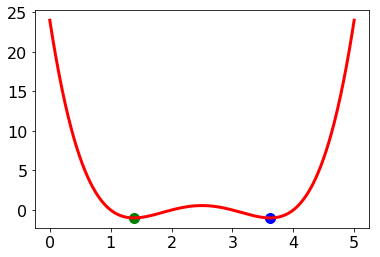

In [3]:
def myfun(x):
    return (x-1)*(x-2)*(x-3)*(x-4)

# initial guess 3
sol = minimize(myfun,3)
plt.plot(sol.x,myfun(sol.x),'o',lw=3,color ='b',markersize=10)

print("Success? %r" % sol.success)
print("Solution: %g" % sol.x[0])
print("Number of function evaluations: %d" % sol.nfev)
print("Number of iterations: %d" % sol.nit)
print("")

# initial guess -3
sol = minimize(myfun,-3)
plt.plot(sol.x,myfun(sol.x),'o',lw=3,color ='g',markersize=10)

print("Success? %r" % sol.success)
print("Solution: %g" % sol.x[0])
print("Number of function evaluations: %d" % sol.nfev)
print("Number of iterations: %d" % sol.nit)


x = np.linspace(0,5,1000)
plt.plot(x,myfun(x),lw=3,color='r')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Simple constrained optimization example

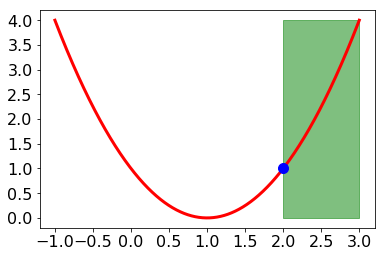

In [4]:
def myfun(x):
    return (x-1)**2

lower = 2
upper = 3

sol = minimize(myfun,0, bounds = [[lower,upper]])

x = np.linspace(-1,3,1000)



plt.plot(x,myfun(x),lw=3,color='r')
plt.plot(sol.x,myfun(sol.x),'o',lw=3,color ='b',markersize=10)
plt.fill_between([lower,lower,upper,upper],[0,4,4,0],color='g',alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 2D Optimization Problem -- unconstrained

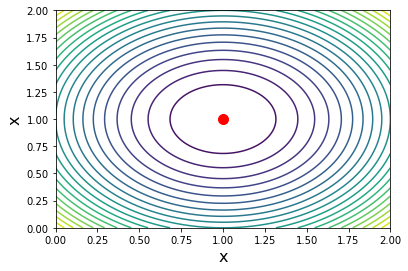

In [5]:
def myfun(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2

sol = minimize(myfun,[0,0])


# plot up the function
x = np.linspace(0,2,1000)
y = np.linspace(0,2,1000)
X,Y = np.meshgrid(x,y)

Z = myfun([x[None,:],y[:,None]])

plt.contour(X,Y,Z,20)
plt.plot(sol.x[0],sol.x[1],'o',markersize=10,color='r')
plt.xlabel('x',fontsize=16)
plt.ylabel('x',fontsize=16)
plt.show()

### 2D Optimization Problem -- bounded

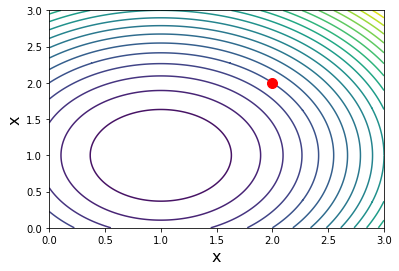

In [6]:
def myfun(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2

sol = minimize(myfun,[0,0], bounds = [[2,5],[2,5]])


# plot up the function
x = np.linspace(0,3,1000)
y = np.linspace(0,3,1000)
X,Y = np.meshgrid(x,y)

#Z = np.zeros_like(X)
#for i in range(len(x)):
#    for j in range(len(x)):
#        Z[j,i] = myfun([x[i],y[j]])
        
#Z= [[myfun([xi,yi]) for xi in x] for yi in y]

Z = myfun([x[None,:],y[:,None]])

plt.contour(X,Y,Z,20)
plt.plot(sol.x[0],sol.x[1],'o',markersize=10,color='r')
plt.xlabel('x',fontsize=16)
plt.ylabel('x',fontsize=16)
plt.show()

### 2D Optimization Problem -- equality constrained

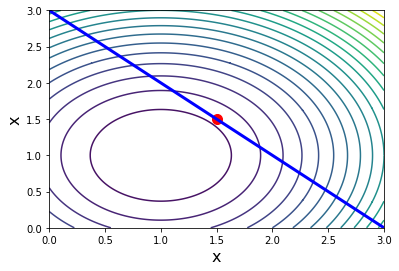

In [7]:
def myfun(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2

# x+y = 3
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] - 3})

sol = minimize(myfun,[0,0],constraints=cons)

# plot up the function
x = np.linspace(0,3,1000)
y = np.linspace(0,3,1000)
X,Y = np.meshgrid(x,y)
Z = myfun([x[None,:],y[:,None]])

plt.contour(X,Y,Z,20)
plt.plot(sol.x[0],sol.x[1],'o',markersize=10,color='r')
plt.plot(x,3-x,lw=3,color='b')
plt.xlabel('x',fontsize=16)
plt.ylabel('x',fontsize=16)
plt.show()

### 2D Optimization Problem -- nonlinear equality constrained

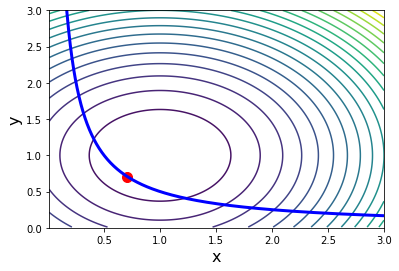

In [8]:
def myfun(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2


cons = ({'type': 'eq', 'fun': lambda x:  x[0] - 0.5/x[1]})

sol = minimize(myfun,[1,1],constraints=cons)

# plot up the function
x = np.linspace(0.01,3,1000)
y = np.linspace(0.01,3,1000)
X,Y = np.meshgrid(x,y)
Z = myfun([x[None,:],y[:,None]])

plt.contour(X,Y,Z,20)
plt.plot(sol.x[0],sol.x[1],'o',markersize=10,color='r')
plt.plot(x,0.5/x,lw=3,color='b')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.ylim(0,3)
plt.show()

### 2D Optimization Problem -- inequality constrained

True


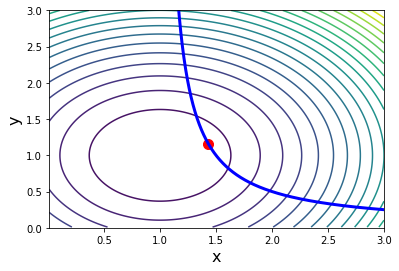

In [9]:
def myfun(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2

# x - 0.5/y <= 1
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 0.5/x[1]-1})

sol = minimize(myfun,[1,1],constraints=cons)
print(sol.success)
# plot up the function
x = np.linspace(0.01,3,1000)
y = np.linspace(0.01,3,1000)
X,Y = np.meshgrid(x,y)
Z = myfun([x[None,:],y[:,None]])

plt.contour(X,Y,Z,20)
plt.plot(sol.x[0],sol.x[1],'o',markersize=10,color='r')

x = np.linspace(1.01,3,1000)
plt.plot(x,0.5/(x-1),lw=3,color='b')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.ylim(0,3)
plt.show()

### 2D Optimization Problem --  2 equality constraints

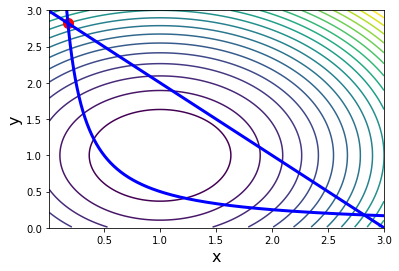

In [161]:
def myfun(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2


cons = ({'type': 'eq', 'fun': lambda x:  x[0] - 0.5/x[1]},
       {'type': 'eq', 'fun': lambda x:  x[0] + x[1]-3})

sol = minimize(myfun,[3,3],constraints=cons)

# plot up the function
x = np.linspace(0.01,3,1000)
y = np.linspace(0.01,3,1000)
X,Y = np.meshgrid(x,y)
Z = myfun([x[None,:],y[:,None]])

plt.contour(X,Y,Z,20)
plt.plot(sol.x[0],sol.x[1],'o',markersize=10,color='r')
plt.plot(x,0.5/x,lw=3,color='b')
plt.plot(x,3-x,lw=3,color='b')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.ylim(0,3)
plt.show()